In [1]:
import numpy as np

In [3]:
arr = np.array([1,6,6,3,12,5,9])

In [6]:
X = arr.mean()
X

6.0

In [9]:
std = arr.std()
std

3.3806170189140663

In [13]:
V = std / X * 100
V

56.3436169819011

In [14]:
arr_x = np.array([40,60,55,65,45])
arr_y = np.array([11,19,14,15,21])

In [16]:
r_xy = np.corrcoef(arr_x, arr_y)
r_xy

array([[1.        , 0.18084106],
       [0.18084106, 1.        ]])

# Efekt katalizy

In [291]:
R0 = np.array([-0.7, 0.22, -0.45])
R = np.array([1, -0.76, -0.44, -0.76, 1, -0.18, -0.44, -0.18, 1]).reshape([3,3])
R

array([[ 1.  , -0.76, -0.44],
       [-0.76,  1.  , -0.18],
       [-0.44, -0.18,  1.  ]])

In [292]:
d = dict()

for i, el in enumerate(R0):
    if abs(el) not in d:
        d[abs(el)] = [i]

R0p = sorted(abs(R0))

for i, el in enumerate(R0p):
    d[abs(el)].append(i)
    
print(d)

{0.7: [0, 2], 0.22: [1, 0], 0.45: [2, 1]}


In [293]:
shape = R.shape[0] * R.shape[1]
a = np.zeros(shape).reshape([R.shape[0], -1])

indexes = []
for i, el in enumerate(R0):
    if abs(el) != el:
        indexes.append(i)
        
for i in indexes:
    a[:,i] += 1
    a[i,:] += 1

a = np.where(a > 0, -1, 1)
a
R = a * R
np.fill_diagonal(R, 1)
R

array([[1.  , 0.76, 0.44],
       [0.76, 1.  , 0.18],
       [0.44, 0.18, 1.  ]])

In [329]:
shape = R.shape[0] * R.shape[1]
Rp = np.zeros(shape).reshape([R.shape[0], -1])
np.fill_diagonal(Rp, 1)
Rp

map_Z_to_X = {k[1]:k[0] for k in sorted(d.values(), key=lambda item: item[1])}
print(map_Z_to_X)
for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        if R[i][j] == 1:
            continue
        else:
            Rp[i][j] = R[map_Z_to_X[i]][map_Z_to_X[j]]

Rp

{0: 1, 1: 2, 2: 0}


array([[1.  , 0.18, 0.76],
       [0.18, 1.  , 0.44],
       [0.76, 0.44, 1.  ]])

# Katalizator i macierz neutralna

In [323]:
# tworzenie macierzy uniwersalnej

shape = R.shape[0] * R.shape[1]
Q = np.zeros(shape).reshape([R.shape[0], -1])

R0p_copy = R0p

for i, x in enumerate(R0p):
    for j, y in enumerate(R0p_copy):
        if x < y:
             Q[i][j] = x/y


Q += np.rot90(np.fliplr(Q))
np.fill_diagonal(Q, 1)
Q

array([[1.        , 0.48888889, 0.31428571],
       [0.48888889, 1.        , 0.64285714],
       [0.31428571, 0.64285714, 1.        ]])

In [335]:
# porównanie czy Rp z Q

if (Q < 0).any() or (Q > Rp).any():
    if (Q < 0).any():
        print('Efekt katalizy - elementy ujemne w maicerzy')
    if (Q > Rp).any():
        for i in range(Rp.shape[0]):
            for j in range(i, Rp.shape[1]):
                if Q[i][j] < Rp[i][j]:
                    print(f'Kataliza między Z{i+1} i Z{j+1}, czyli X{map_Z_to_X[i]+1} i X{map_Z_to_X[j]+1}')
                    if i < j:
                        print(f'Zmienna kataliczna: X{map_Z_to_X[i]+1}')
                    else:
                        print(f'Zmienna kataliczna: X{map_Z_to_X[j]+1}')
        
else:
    print('False')

Kataliza między Z1 i Z3, czyli X2 i X1
Zmienna kataliczna: X2


# Obliczanie regresji

In [768]:
Y = np.array([10,15,13,17,18,25,22,20,25,35,30,35,38,40,41])
X = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]).T
X
               

array([[ 1,  1],
       [ 1,  2],
       [ 1,  3],
       [ 1,  4],
       [ 1,  5],
       [ 1,  6],
       [ 1,  7],
       [ 1,  8],
       [ 1,  9],
       [ 1, 10],
       [ 1, 11],
       [ 1, 12],
       [ 1, 13],
       [ 1, 14],
       [ 1, 15]])

In [520]:
from numpy.linalg import inv
from numpy.linalg import matrix_rank
import math
from functools import reduce

In [521]:
def multiply_matrix(A,B):
    try:
        return A.T @ B
    except:
        print('Cannot multiply')
        

In [522]:
# obliczamy X*X.T - potrzebne do macierzy odwrotnej

L = multiply_matrix(X,X)
L

array([[  10,  103,   60],
       [ 103, 1089,  638],
       [  60,  638,  390]])

In [523]:
def inverse_matrix(A, rank=3):
    x = []
    if np.linalg.det(A) != 0:
        x.append(True)
    else:
        x.append(False)
        print('Cannot inverse - matrix determinant equals 0 - modelu nie da się oszacować!')
        
    if (A.transpose() == A).all():
        x.append(True)
        
    else:
        x.append(False)
        print('Macierz niesymetryczna')
#         return inv(A)
    
    if matrix_rank(A) == rank:
        x.append(True)
    else:
        x.append(False)
        print('Matrix rank error')
    
#     s = 0
#     for el in A.diagonal():
#         if el < 0:
#             s += 1
    s = reduce(lambda acc, el: el < 0, A.diagonal() )
    
    if s != 0:
        x.append(False)
        print('Main diagonal elements not positive ')
    else:
        x.append(True)
        
    if all(x) == True:
        return inv(A)
    else:
        print('Cannot inverse matrix')
    

In [524]:
inverse = inverse_matrix(L) 
inverse

array([[ 3.98781038, -0.42663657,  0.08442438],
       [-0.42663657,  0.06772009, -0.04514673],
       [ 0.08442438, -0.04514673,  0.06343115]])

In [525]:
# wyznaczanie paramterów a modelu teoretycznego
def get_parameters(A, B, C):
    return A @ B.T @ C

params = get_parameters(inverse, X, Y)
params

array([58.91963883,  2.18735892,  3.24176072])

# Dopasowanie modelu do danych empirycznych

In [526]:
def check_real_vs_teoretical_y(regression_params, x_values):
    
    theoretical_y = []
    for row in x_values:
        partial = 0
        for i in range(len(regression_params)):
            partial += row[i] * regression_params[i]
        y = partial
        theoretical_y.append(y)
    
    return theoretical_y


In [527]:
theoretical_y = check_real_vs_teoretical_y(params, X)
theoretical_y

[97.00203160270901,
 105.67291196388288,
 113.28939051918759,
 111.10203160270908,
 86.14379232505664,
 91.57291196388283,
 92.62731376975199,
 101.37674943566604,
 108.91467268623056,
 101.29819413092586]

In [528]:
def get_rests_theoretical_vs_real_y(theoretical_y, real_y):
    rests = []
    for i in range(len(real_y)):
        rests.append(real_y[i] - theoretical_y[i])
    return rests

In [529]:
e = get_rests_theoretical_vs_real_y(theoretical_y, Y)
e

[-2.0020316027090104,
 -2.672911963882882,
 -2.2893905191875916,
 -0.10203160270907574,
 3.856207674943363,
 0.42708803611716917,
 -4.627313769751993,
 0.6232505643339579,
 7.08532731376944,
 -0.29819413092586444]

In [530]:
# wariancja resztowa

def remainder_variance(rests_arr, real_y, model_params):
    return sum(np.power(rests_arr,2)) / (len(real_y) - (len(model_params)))


In [531]:
Se_2 = remainder_variance(e, Y, params)
Se_2

14.792615285391813

In [532]:
# odchylenie standardowe reszt

def remainder_std(variance):
    return math.sqrt(variance)

In [533]:
Se = remainder_std(Se_2)
Se

3.8461169100005024

In [534]:
# współczynnik zmienności losowej

def coeff_of_variation(real_y, remainder_std):
    return remainder_std / np.mean(real_y)

In [535]:
W_e = coeff_of_variation(Y, Se)
W_e

0.0381181061447027

In [536]:
if W_e < 0.1:
    print('Jest ok')
else:
    print('Model źle dopasowany')

Jest ok


# Współczynnik determinacji i zbieżność : R^2 i fi_2

In [537]:
def get_R2(error, real_y):
    nominator = np.sum(np.power(error,2))
    denominator = np.sum(np.power(real_y-np.mean(real_y),2))
    return 1 - (nominator / denominator)

In [538]:
R2 = get_R2(e, Y)
R2

0.8762715892009288

In [539]:
def get_fi2(R2):
    return 1 - R2

In [540]:
fi2 = get_fi2(R2)
fi2

0.12372841079907115

In [541]:
def get_R(R2):
    return math.sqrt(R2)

In [542]:
R = get_R(R2)
R

0.9360937929507539

# Istotność wsp. korelacji R

1. Hipotezy:
    - H0: R = 0
    - H1: R != 0

In [543]:
#define F-test function

import scipy.stats 

def f_test(R2, real_y, parameters, p):
 
    f = (R2 / (1 - R2)) * ((len(real_y) - len(params)) / (len(params) - 1))

    dfn = len(params) - 1
    dfd = len(real_y) - len(params)
    crit = scipy.stats.f.ppf(q=1-p, dfn=dfn, dfd=dfd) 
    if f > crit:
        print('F > F*  - Wsp, korelacji wielorajiej jest istotny. Dopasowanie modelu do danych jest wysokie.')
    else:
        print('F < F*  - Wsp, korelacji wielorajiej jest NIEistitny. Dopasowanie modelu do danych jest niskie.')
    return f, crit
   

#perform F-test
f_test(R2, Y, params, 0.05)


F > F*  - Wsp, korelacji wielorajiej jest istotny. Dopasowanie modelu do danych jest wysokie.


(24.78776331479621, 4.73741412777588)

# Błędy standardowe ocen parametrów - model z 1 zmienna objaśniającą

In [544]:
import statistics

def calc_std_a0(remainder_std, x_values, num_observations):
    xt_mean = np.mean(x_values)
    xt_2 = sum(np.power(x_values, 2))
    sqrt_value = xt_2 / (num_observations * (xt_2 - num_observations * np.power(xt_mean, 2)))
    return remainder_std * np.sqrt(sqrt_value)

In [545]:
S_a0 = calc_std_a0(Se, X[:, 1], len(Y))
print(f'S(a0) = {S_a0}')

S(a0) = 7.571523266540974


In [546]:
def calc_std_a1(remainder_std, x_values, num_observations):
    xt_2 = sum(np.power(x_values, 2))
    xt_mean = np.mean(x_values)
    sqrt_value = xt_2 - num_observations * np.power(xt_mean, 2)
    return remainder_std / np.sqrt(sqrt_value)

In [547]:
S_a1 = calc_std_a1(Se, X[:, 1], len(Y))
print(f'S(a1) = {S_a1}')

S(a1) = 0.7255532993705344


In [548]:
# względne średnie błędy szacunku

def calc_realtive_mean_error(std_a, yt_param):
    value = abs(std_a / yt_param) * 100
    if value < 50:
        print(f'Model oceniamy pozytywnie: względny błąd parametru to {value}')
    else:
        print(f'Model oceniamy NEGATYWNIE: względny błąd parametru to {value}')
    return value

In [549]:
V_a0 = calc_realtive_mean_error(S_a0, params[0])
V_a0

Model oceniamy pozytywnie: względny błąd parametru to 12.850593481873112


12.850593481873112

In [550]:
V_a1 = calc_realtive_mean_error(S_a1, params[1])
V_a1

Model oceniamy pozytywnie: względny błąd parametru to 33.170290156981736


33.170290156981736

# Błędy standardowe ocen parametrów - model z wieloma zmiennymi objaśniającymi

In [551]:
def calc_std_errors(inverse_matrix, remainder_variance):
    return np.diagonal(remainder_variance * inverse_matrix)

In [552]:
# otrzymujemy wariancje błędów

D2_a = calc_std_errors(inverse, Se_2)
D2_a

array([58.99014484,  1.00175724,  0.93831262])

In [553]:
def get_params_std(error_variance_arr):
    std = []
    print('Odchylenia standardowe błędów')
    for i, el in enumerate(error_variance_arr):
        std.append(np.sqrt(el))
        print(f'a{i}: {np.sqrt(el)}')
    return std

In [554]:
std_params = get_params_std(D2_a)

Odchylenia standardowe błędów
a0: 7.680504204664109
a1: 1.000878235752512
a2: 0.9686653794915607


In [555]:
# błędy względne

def relative_errors(model_params, std_errors):
    relative_errs = []
    if_positive = []
    for i in range(len(model_params)): 
        value = abs(std_errors[i] / model_params[i]) * 100
        relative_errs.append(value)
        
        if value < 50:  
            if_positive.append(value)
            print(f'Wartość względna wynosi: {value}')
        else:
            print(f'Wartość względna jest zbyt duża: {value}')
    if len(if_positive) == len(model_params):
        print('Model oceniamy pozytywnie')
    else:
        print('Model oceniamy negatywnie')
    return relative_errs

In [556]:
V_a = relative_errors(params, std_params)

Wartość względna wynosi: 13.03555886912647
Wartość względna wynosi: 45.757384771761764
Wartość względna wynosi: 29.880841383939494
Model oceniamy pozytywnie


# Szacowanie istoyności zmiennych objaśniających

# -- Test T-Studenta

In [557]:
from scipy.stats import t

Hipotezy:
    - H0: alpha = 0
    - H1: alpha != 0

In [560]:
def calc_t_student(yt_params, yt_values, params_std, alpha = 0.05):
    df = len(yt_values) - len(yt_params)
    critical_value = t.ppf(1.0 - alpha/2, df) # alfe dziele na dwa bo jest rozkład o 2 końcach a t.ppf jest dla rozkładu o 1 końcu
    print(critical_value)

    stats = []

    for i, el in enumerate(yt_params):
        stat_t = abs(yt_params[i]) / params_std[i]
        stats.append(stat_t)
        if stat_t < critical_value:
            print(f't* > t{i}: t* = {critical_value}, t{i} = {stat_t}')
            print(f'Nie ma podstawy by odrzucić hipotezę H0. Oznacza to, że wpływ zmiennej X{i} jest statystycznie nieistoty na zmienną Y.')
    
    
    return stats

In [561]:
x = calc_t_student(params, Y, std_params, alpha = 0.05)
x

2.3646242510102993
t* > t1: t* = 2.3646242510102993, t1 = 2.1854395852997475
Nie ma podstawy by odrzucić hipotezę H0. Oznacza to, że wpływ zmiennej X1 jest statystycznie nieistoty na zmienną Y.


[7.671324337067039, 2.1854395852997475, 3.3466259773310303]

# -- Uogólniony test Walda

Hipotezy:
    - H0: alpha_1 = alpha_2 = ... = alpha_k = 0
    - H1: conajmniej jeden z paramterów alpha_i != 0

In [566]:
import scipy.stats 

def f_test(R2, real_y, parameters, alpha = 0.05):
 
    f = (R2 / (1 - R2)) * ((len(real_y) - len(params)) / (len(params) - 1))

    dfn = len(params) - 1
    dfd = len(real_y) - len(params)
    crit = scipy.stats.f.ppf(q=1-alpha, dfn=dfn, dfd=dfd) 
    if f > crit:
        print(f'F > F*  - odrzucamy hipotezę H0 na rzecz hipotezy H1. Oznacza to, że istnieje taka zmienna Xi, która ma statystycznie istotny wpływ na zmienną Y. PRAWDOPODOBIENSTWO POPEŁNIENI BŁĘDU, POLAGAJĄCEGO NA PODJĘCIU ZŁEJ DECYZJI WYNOSI alpha= {alpha}')
    else:
        print(f'F < F*  - brak podstaw by idrzucić hipotezę H0. Oznacza to, że NIE istnieje taka zmienna Xi, która ma statystycznie istotny wpływ na zmienną Y - wszystkie zmienne są nieistotne dla rezpatrywanego modelu. PRAWDOPODOBIENSTWO POPEŁNIENI BŁĘDU, POLAGAJĄCEGO NA PODJĘCIU ZŁEJ DECYZJI WYNOSI alpha = {alpha}')
    return f, crit
   

#perform F-test
f_test(R2, Y, params)

F > F*  - odrzucamy hipotezę H0 na rzecz hipotezy H1. Oznacza to, że istnieje taka zmienna Xi, która ma statystycznie istotny wpływ na zmienną Y. PRAWDOPODOBIENSTWO POPEŁNIENI BŁĘDU, POLAGAJĄCEGO NA PODJĘCIU ZŁEJ DECYZJI WYNOSI alpha= 0.05


(24.78776331479621, 4.73741412777588)

# Przedziały ufności dla parametrów alpha_i

In [589]:
def calc_t_student(yt_params, yt_values, params_std, alpha = 0.05):
    df = len(yt_values) - len(yt_params)
    critical_value = t.ppf(1.0 - alpha/2, df) # alfe dziele na dwa bo jest rozkład o 2 końcach a t.ppf jest dla rozkładu o 1 końcu
    print(critical_value)

    stats = []
    print(f'Przedziały ufności dla paramterów modelu szacowane na {(1-alpha)*100}%:')
    print('Wartości parametrów mieszczą się w przedziałach:')
    for i, el in enumerate(yt_params):
        stat_l = yt_params[i] - critical_value * params_std[i]
        stat_p = yt_params[i] + critical_value * params_std[i]
        
        stats.append([stat_l, stat_p])
        print(f' - dla alpha{i}: {stat_l, stat_p}')
    
    
    return stats

In [590]:
x = calc_t_student(params, Y, std_params, alpha = 0.05)
x

2.3646242510102993
Przedziały ufności dla paramterów modelu szacowane na 95.0%:
Wartości parametrów mieszczą się w przedziałach:
 - dla alpha0: (40.758132323850184, 77.08114532852082)
 - dla alpha1: (-0.17934203209028077, 4.554059865047305)
 - dla alpha2: (0.951231074887839, 5.532290369807517)


[[40.758132323850184, 77.08114532852082],
 [-0.17934203209028077, 4.554059865047305],
 [0.951231074887839, 5.532290369807517]]

# Badanie rozkładu odchyleń losowych

# - test serii (Wald–Wolfowitz runs test)

In [647]:
import scipy.stats as st

In [707]:
def calc_runs_test(remainder_err, alpha= 0.05):
    series = []
    prev = remainder_err[0]
    
    for el in remainder_err:
        if el < 0:
            series.append('B')
        elif el > 0:
            series.append('A')
        elif el == 0:
            continue
    
    n1 = reduce(lambda x, y: x + 1 if y == 'A' else x, series, 0)
    n2 = reduce(lambda x, y: x + 1 if y == 'B' else x, series, 0)
    
    r = 0
    prev = 'x'
    for el in series:
        if el != prev:
            r += 1
            prev = el
        elif el == prev:
            prev = el
    
    N = n1+n2
    mean = 2*n1*n2/ N + 1
#     print(n1, n2, r, mean)
    
    variance = (mean-1)*(mean-2) / (N-1)
#     print(variance)
    z = (r - mean) / np.sqrt(variance)
    z_crit = st.norm.ppf(1-alpha, mean, np.sqrt(variance))
    if z < z_crit:
        print('Nie ma podstaw by odrzucić hipotezę H0 - występuje liniowa zależność zmiennych X od zmiennej Y.')
    else:
        print('Odrzucamy H0 na korzyść H1 - występuje ieliniowa zależność między zmiennymi X a amienną Y.')
    
    return z, z_crit
         

In [710]:
a = calc_runs_test([-1.12, 0.77, -0.17, -0.34, 1.88, -0.01, -0.73, 0.65, 0.91])
a

Nie ma podstaw by odrzucić hipotezę H0 - występuje liniowa zależność zmiennych X od zmiennej Y.


(0.4016096644512493, 7.71980694543705)

In [683]:
from statsmodels.sandbox.stats.runs import runstest_1samp

def calc_runs_test(remainder_err, alpha=0.05):
    crit = runstest_1samp(remainder_err, correction=False)[1]
    
    if crit > alpha:
        print('Nie ma podstaw by odrzucić hipotezę H0 - występuje liniowa zależność zmiennych X od zmiennej Y.')
    else:
        print('Odrzucamy H0 na korzyść H1 - występuje ieliniowa zależność między zmiennymi X a amienną Y.')

In [684]:
calc_runs_test(e)

Nie ma podstaw by odrzucić hipotezę H0 - występuje liniowa zależność zmiennych X od zmiennej Y.


In [709]:
e

[-2.0020316027090104,
 -2.672911963882882,
 -2.2893905191875916,
 -0.10203160270907574,
 3.856207674943363,
 0.42708803611716917,
 -4.627313769751993,
 0.6232505643339579,
 7.08532731376944,
 -0.29819413092586444]

# - test Shapiro-Wilka

In [718]:
from scipy.stats import shapiro

def calc_shapiro_wilk_rate(remainder_err):

    stat, p = shapiro(remainder_err)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Nie ma podstaw by odrzucić hipotezę H0 - rozkład odchyleń losowych jest losowy.')
        print('Model oceniamy pozytywnie.')
    else:
        print('Odrzycamy H0 na korzyść H1 - rozkład odchyleń losowych NIE jest losowy.')
        print('Model oceniamy negatywnie.')
    return (stat, p)

In [719]:
shapiro_wilk = calc_shapiro_wilk_rate([-1.12, 0.77, -0.17, -0.34, 1.88, -0.01, -0.73, 0.65, 0.91])

stat=0.972, p=0.910
Nie ma podstaw by odrzucić hipotezę H0 - rozkład odchyleń losowych jest losowy.
Model oceniamy pozytywnie.


# - test Harrisona-McCabe'a

In [746]:
def calc_Harrison_McCabe(remainder_err, alpha=0.05):
    n = len(remainder_err) 
    if n % 2 == 0:
        m = n // 2
    else:
        m = (n - 1) // 2
    
    et2_n = sum([x**2 for x in remainder_err])
    et2_m = sum([x**2 for x in remainder_err[:m]])
    
    b = et2_m / et2_n
    F1 = scipy.stats.f.ppf(q=1-alpha, dfn=n-m, dfd=m-3) # ta 3 tu do zmiany
    F2 = scipy.stats.f.ppf(q=1-alpha, dfn=n-m-3, dfd=m)
    
    b_lower = np.power( 1 + ((n-m)*F1) / (m-(3))  , -1)
    b_upper = np.power(   1 + ((n-m-3)*F2) / m    , -1)
    
    if b <= b_lower:
        print('Odrzucamy H0 na korzyść H1. Model oceniamy negatywnie')
    elif b > b_lower and b < b_upper:
        print('Obszar nierozstrzygalności')
    elif b >= b_upper:
        print('Nie ma podstaw by odrzucić H0. Model oceniamy pozytywnie')
    return (b_lower, b, b_upper)

In [747]:
harrison_mccabe = calc_Harrison_McCabe([-1.12, 0.77, -0.17, -0.34, 1.88, -0.01, -0.73, 0.65, 0.91], alpha=0.05)
harrison_mccabe

Nie ma podstaw by odrzucić H0. Model oceniamy pozytywnie


(0.000868199207441805, 0.27248351528085585, 0.22360679774997905)

# Autokorelacja reszt

In [751]:
def calc_ro(remainder_err):
    nominator = sum([remainder_err[x] * remainder_err[x-1] for x in range(1, len(remainder_err))])
    denominator = np.sqrt(sum([x**2 for x in remainder_err[1:]])) * np.sqrt(sum([x**2 for x in remainder_err[:-1]]))
    return nominator / denominator

In [753]:
ro_value = calc_ro([-1.12, 0.77, -0.17, -0.34, 1.88, -0.01, -0.73, 0.65, 0.91])
ro_value

-0.23451198261737427

In [756]:
if ro_value < 0.3:
    print('Podejrzewamy, że autokorelacja jest nieistotna')
else:
    print('Istnieje podejrzenie, że autokorelacja składnika losowego jest istotna. Należy wykonac test Durbina - Watsona')

Podejrzewamy, że autokorelacja jest nieistotna


# Test Durbina-Watsona


In [757]:
from statsmodels.stats.stattools import durbin_watson

In [764]:
def calc_durbin_watson(remainder_err):
    print(f'Wartość statystyki wynosi {durbin_watson(remainder_err)}')
    return durbin_watson(remainder_err)

In [765]:
DW = calc_durbin_watson([-1.12, 0.77, -0.17, -0.34, 1.88, -0.01, -0.73, 0.65, 0.91])
DW

Wartość statystyki wynosi 2.1170893868505294


2.1170893868505294

In [766]:
if DW >= 0 and DW <=4:
    print('Wartość statystyki mieści się w przedziale [0, 4]')
else:
    print('Wartość statystyki NIE mieści się w przedziale [0, 4], prawdopodobny błąd w obliczeniach')

Wartość statystyki mieści się w przedziale [0, 4]


# Prognozowanie na podstawie modelu

yt = b + at

In [784]:
Y = np.array([10,15,13,17,18,25,22,20,25,35,30,35,38,40,41])
t = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]).T


In [804]:
def get_parameter_a(t_values, yt_values):
    t_mean = np.mean(t_values)
    y_mean = np.mean(yt_values)
    
    nominator = 0
    denominator = 0
    for i in range(len(yt_values)):
        nominator += (t_values[i] - t_mean) * (yt_values[i] - y_mean)
        denominator += np.power((t_values[i] - t_mean),2)
    return nominator / denominator

In [806]:
a = get_parameter_a(t[:,1], Y)
a

2.225

In [807]:
def get_parameter_b(t_values, yt_values, param_a):
    t_mean = np.mean(t_values)
    y_mean = np.mean(yt_values)
    b = y_mean - param_a * t_mean
    return b

In [808]:
b = get_parameter_b(t[:,1], Y, a)
b

7.800000000000001

In [816]:
print(f'yt = {b:.3f} + {a} t')
    

yt = 7.800 + 2.225 t


In [820]:
yt = [b + a*t for t in t[:, 1]]


In [828]:
import matplotlib.pyplot as plt


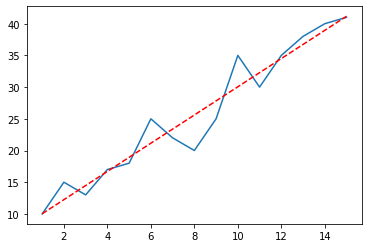

In [829]:
plt.plot(t[:,1],Y)
plt.plot(t[:,1],yt,"r--")
